In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler # to normalize data (NN is very sensitive to this!)
from sklearn.model_selection import train_test_split #to split in train and test set
from sklearn.linear_model import LogisticRegression #logistic regression classifier
from sklearn.neural_network import MLPClassifier # neural network classifier
#from sklearn.model_selection import cross_val_score #BONUS: to tune parameters using cross-validation
from sklearn.metrics import classification_report, confusion_matrix # for reporting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [3]:
# loading the data as feature matrix and target vector
# regularising parameters with library command (see discussion of results)
data_matrix = datasets.load_digits()
X_mnist = np.reshape(data_matrix.images, (1797,64))
y_mnist = data_matrix.target
X_mnist_reg = StandardScaler().fit_transform(X_mnist)

In [4]:
# I use train_test_split instead of manual split on the data-set, in order to have random instances, not first p% 
#of the matrix; remove some_number from random_state after testing 
#for test_sizes smaller than 0.4, the fitted values for both regressions 
#did not have a positiv effect on the test score. So I decided to take rather a bigger test-sample size.
#Also, since the cross-validation 
#is done in a 10-fold manner, we can rather choose 
#a bigger test sample and a smaller training/cross-validation 
#sample (which are the same for k-fold cv)
X_train, X_test, y_train, y_test = train_test_split(X_mnist_reg, y_mnist, test_size=0.4, random_state=0)

In [15]:
# train logistic classifier with default settings
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)

#build k-nn classifier with default settings
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

log_score = cross_val_score(
    log_clf, X_train, y_train, scoring = "accuracy", cv = k_fold)
knn_score = cross_val_score(
    knn_clf, X_train, y_train, scoring = "accuracy", cv = k_fold)

In [18]:
# cross-validation with regularization parameter in Logistic regresseion (more inf in discussion of results)
k_fold = 10
C_range = [0.01,0.4,1,1.3,1.5,2,4,6,10]
k_range = [1,3,2,5,7]
log_parameters = {"C": C_range}
knn_parameters = {"n_neighbors": k_range}


# train C in 10-fold Cross Validation for LogisticRegression
cv_log_clf = GridSearchCV(
    LogisticRegression(), log_parameters, 
    scoring = "accuracy", cv = k_fold)
cv_log_clf.fit(X_train,y_train)

# train k in 10-fold Cross Validation for nearest neighbor-classifier
cv_knn_clf = GridSearchCV(
    KNeighborsClassifier(), knn_parameters, 
    scoring = "accuracy", cv = k_fold)
cv_knn_clf.fit(X_train,y_train)

# test performance of both classifiers on Cross-validation-set (10-fold cv)
# performance measured as mean accuracy cv sets (10-fold)
cv_log_score = cross_val_score(
    cv_log_clf, X_train, y_train, scoring = "accuracy", cv = k_fold)
cv_knn_score = cross_val_score(
    cv_knn_clf, X_train, y_train, scoring = "accuracy", cv = k_fold)

In [26]:
# print metrics for both classifiers
print(
"""Logistic Regression classifier with fitted value for C:{0}: accuracy on cv set: 
        -mean:{1}, (compares to mean:{3} with not fitted C)
        -std:{2}""".format(
    cv_log_clf.best_params_["C"],
    round(np.mean(cv_log_score), 4),
    round(np.std(cv_log_score),4), 
    round(np.mean(log_score), 4)))

print(
"""knn classifier with fitted value for k:{0}: accuracy on cv set: 
        -mean:{1} (compares to mean:{3} with not fitted k)
        -std:{2}""".format(
    cv_knn_clf.best_params_["n_neighbors"],
    round(np.mean(cv_knn_score), 4),
    round(np.std(cv_knn_score),4),
    round(np.mean(knn_score), 4)))

Logistic Regression classifier with fitted value for C:1: accuracy on cv set: 
        -mean:0.959, (compares to mean:0.961 with not fitted C)
        -std:0.0214
knn classifier with fitted value for k:5: accuracy on cv set: 
        -mean:0.9657 (compares to mean:0.9658 with not fitted k)
        -std:0.0176


In [21]:
# means and standard deviations for different values of hyper parameters
cv_log_meanAccuracy = []
cv_log_stdAccuracy = []

for i in C_range:
    ith_clf = LogisticRegression(C = i).fit(X_train, y_train)
    x = cross_val_score(
        ith_clf, X_train, y_train, scoring = "accuracy", cv=k_fold)
    cv_log_meanAccuracy = np.append(cv_log_meanAccuracy, np.mean(x))
    cv_log_stdAccuracy = np.append(cv_log_stdAccuracy, np.std(x))
    
cv_knn_meanAccuracy = []
cv_knn_stdAccuracy = []

for i in k_range:
    ith_clf = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    x = cross_val_score(
        ith_clf, X_train, y_train, scoring = "accuracy", cv=k_fold)
    cv_knn_meanAccuracy = np.append(cv_knn_meanAccuracy, np.mean(x))
    cv_knn_stdAccuracy = np.append(cv_knn_stdAccuracy, np.std(x))

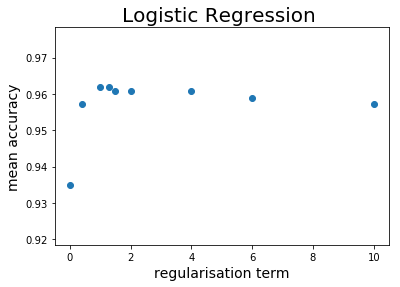

In [27]:
# draw mean accuracies on cv-set dependent on hyper parameter values (C, k)
plt.figure(1)
plt.title("Logistic Regression ", fontsize = 20)
plt.xlabel("regularisation term", fontsize = 14)
plt.ylabel("mean accuracy", fontsize = 14)
plt.scatter(C_range, cv_log_meanAccuracy, marker= "o") 
plt.show()

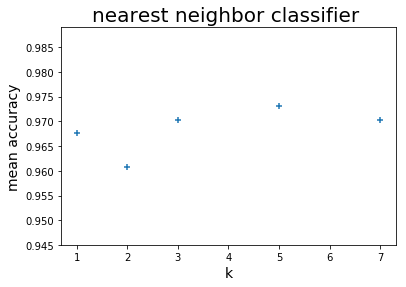

In [28]:
plt.figure(2)
plt.xlabel("k", fontsize = 14)
plt.ylabel("mean accuracy", fontsize = 14)
plt.title("nearest neighbor classifier ", fontsize = 20)
plt.scatter(k_range, cv_knn_meanAccuracy, marker= "+")   
plt.show()

In [11]:
# test performance of both classifiers on test-set
cv_log_report = classification_report(y_test, cv_log_clf.predict(X_test))
print("Report: Logistic Regression:\n\n" + cv_log_report)

cv_knn_report = classification_report(y_test, cv_knn_clf.predict(X_test))
print("Report: nearest neighbor classifier:\n\n" + cv_knn_report)

Report: Logistic Regression:

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        60
          1       0.92      0.96      0.94        73
          2       0.96      0.99      0.97        71
          3       0.94      0.96      0.95        70
          4       0.98      0.98      0.98        63
          5       0.96      0.97      0.96        89
          6       0.99      0.97      0.98        76
          7       0.96      0.98      0.97        65
          8       0.96      0.88      0.92        78
          9       0.97      0.95      0.96        74

avg / total       0.96      0.96      0.96       719

Report: nearest neighbor classifier:

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        60
          1       0.94      0.99      0.96        73
          2       0.96      0.99      0.97        71
          3       0.96      0.97      0.96        70
          4       0.98     

In [12]:
# draw confusion matrix for both classifiers

cv_log_confMatrix = confusion_matrix(y_test,cv_log_clf.predict(X_test))
cv_knn_confMatrix = confusion_matrix(y_test,cv_knn_clf.predict(X_test))
np.set_printoptions(threshold=np.nan)
print("Logistic Regression's confusion matrix")
print(cv_log_confMatrix)
print("\n\n nearest neighbor's confusion matrix")
print(cv_knn_confMatrix)
print("\n\n Difference between conf. matrices")
print(cv_log_confMatrix-cv_knn_confMatrix)

Logistic Regression's confusion matrix
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 70  1  0  0  0  0  0  2  0]
 [ 0  0 70  1  0  0  0  0  0  0]
 [ 0  0  1 67  0  1  0  0  1  0]
 [ 0  0  0  0 62  0  0  1  0  0]
 [ 0  1  0  0  0 86  1  0  0  1]
 [ 0  1  0  0  0  1 74  0  0  0]
 [ 0  0  0  1  0  0  0 64  0  0]
 [ 0  4  1  2  1  0  0  0 69  1]
 [ 0  0  0  0  0  2  0  2  0 70]]


 nearest neighbor's confusion matrix
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 72  1  0  0  0  0  0  0  0]
 [ 0  1 70  0  0  0  0  0  0  0]
 [ 0  0  1 68  0  0  0  0  0  1]
 [ 0  0  0  0 61  0  0  2  0  0]
 [ 0  1  0  0  0 84  1  0  1  2]
 [ 0  0  0  0  0  0 76  0  0  0]
 [ 0  0  0  0  1  0  0 64  0  0]
 [ 0  3  1  2  0  0  0  0 72  0]
 [ 0  0  0  1  0  1  0  1  0 71]]


 Difference between conf. matrices
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0 -2  0  0  0  0  0  0  2  0]
 [ 0 -1  0  1  0  0  0  0  0  0]
 [ 0  0  0 -1  0  1  0  0  1 -1]
 [ 0  0  0  0  1  0  0 -1  0  0]
 [ 0  0  0  0  0  2  0  0 -1 -1]
 [ 0  1  0  0  0  1 -2  0

In [13]:
# MultiLayerPerceptron classifier (Bonus); 
#HDR_range = [(100,),(50,50,),(33,33,33,)]
#NN_parameters = {"hidden_layer_range": HDR_range}
#NN_clf = GridSearchCV(MLPClassifier(solver='lbfgs', alpha=1e-5,), NN_parameters, 
#    scoring = "accuracy", cv = k_fold)
#NN_clf.fit(X_train,y_train)

# Evaluation

- split into train and test sets: see cell 4

- training of logistic and nearest neighbour classifier: both functions are provided in the library and used with the default settings

- training hyperparameters in a k-fold cross-validation procedure: the values I chose to be tested are based on observations of the graphs in cell 9 and 10. I tried to estimate possible maximums and chose test values for C and k respectively. Obviously, this is a redundand step, as i could have chosen the max-values from the graphs directly. To fulfill the assigment requirements, I added GridSearchCV() anyways. 

- evaluation of accuracy scores for improved and non improved hyperparameters: All four mean accuracies printed in cell 17 are very high. Considering that human perception can never reach 100% and ranges somewhere between 97% an 99%, we have to consider these estimators as very good. Since the estemators that were not improved on the CV set are already at ~95% and ~96% respectively, it is not surprising that the improved estimators are not much better. 

- plots of mean accuracies for different values of k and C: we can observe that the LogistigRegression estimator improves a lot between 0 and 1. Since we know that LogisticRegression make bad predictions for very high and very low values of lambda (regression parameter) we can furthermore expect that the given graph would decrease for C->∞. It is important to keep in mind that C is the inverse of lambda. Thus the reason for the poor performance for small C is a too high penalty on the weights (parameters, theta's). In comparison to the graph related to the LogisitcRegression, the nearestNeighbour related graph is much less "smooth". Especially between k=1 and k=2 we see a large jumps. This shows again that the nearest neighbour classifier is (for most distance functions) very sensitive to small changes of k (or the size of the radius).

- report on cv classifiers: like the mean accuracy, the mean values of recall and precision for the classifiers are very high! However, we can observe that certain numbers are more difficult to predict correctly for both classifier. Both but the LogisticRegression Classifier in particular seem to have difficulties identifying eights correctly. Just to speculate, I can imagine that the round shape of the eight is too similar to sixes and zeros. However to make inferences about such relations, it makes more sense to consult the confusion matrixes below. The f1-score that we can interpret as a measure of accuracy, doesn't provide much more information than the above. The values of "support" are not too high. This could be a problem as we can not generalise from the test results with too high confidence. 

- confusion matrix: both classifiers regularly confuse 1,2,3,8. As indicated above, the false-positive value for 8s is the highest. Frequently, they are classified as 2,3 and , interstingly, as 1. It would be interesting to look at the shapes of 1s, since they are intuitively of very different shape than 8s. Also as mentioned above, the nearestNeighbor classifier seems to be better with regard of correct predictions of 8s and of predictions in general. However, examining the matrix representing the differences between both confusion matrixes, we can see that the frequency of negative values dominate. This shows us that the nearest neighbor classifier has good average scores but also many "scattered" outliers. 

